In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs
#The output is a zip object in memory

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

10.212363494867603 -16.89738137538842
-8.598908071498087 -109.73784289701858
80.25720269131583 -59.309329883969355
-41.13932234895218 -47.41640495167894
64.41924930759473 29.3445807024612
-63.40305987489728 -3.131636897496378
-17.898786743503152 -31.797142206142524
44.33968378021848 -78.4578606182123
-20.214556223042862 24.61627411969772
-69.94966375349196 115.8282736236672
19.905045163298013 -148.19741196053474
-42.76704561403861 -147.58697816259317
11.394145068493586 82.59360298399434
-75.27307214066114 165.68133270278594
-51.47588596817727 83.29197691742786
-74.7760801865205 -48.481112369475454
24.706032687328303 -17.454098091628254
78.53622918529851 -110.58780415044578
-17.053908925765597 -70.3885644988048
-0.606828346804761 107.79706606423412
-84.79632840738775 70.46922585607825
-23.302879295682743 101.36428337374502
38.1061572049 111.30101640305662
-23.392409690953386 178.75112564875047
-43.94592443224744 25.544117302604377
26.72805368947199 63.554956188160105
-44.260037454421074

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.

#Retrieve the nearest city using latitude and logitude pair 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# If the city is unique, then we will add it to the cities list.

# We use the decision statement 'not in' to determine whether the found city is already in the 'cities' list

# If it is not in the list we use 'append()' to add it 

# We do this to aviod duplicates and only obtain unique cities out of the 1500 latitude and longitude pairs 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

import requests

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d82747281d32b60b6fcee2f9df4f6876


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bubaque
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | lieksa
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | belmonte
Processing Record 8 of Set 1 | omemee
Processing Record 9 of Set 1 | gweta
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | mamallapuram
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | arona
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ilabaya
Processing Record 20 of Set 1 | pontianak
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1

Processing Record 39 of Set 4 | port hedland
Processing Record 40 of Set 4 | muros
Processing Record 41 of Set 4 | bella union
Processing Record 42 of Set 4 | la union
Processing Record 43 of Set 4 | glebychevo
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | lata
Processing Record 48 of Set 4 | barra do garcas
Processing Record 49 of Set 4 | lao cai
Processing Record 50 of Set 4 | broken hill
Processing Record 1 of Set 5 | saskylakh
Processing Record 2 of Set 5 | nacala
Processing Record 3 of Set 5 | le port
Processing Record 4 of Set 5 | souillac
Processing Record 5 of Set 5 | hun
Processing Record 6 of Set 5 | itarema
Processing Record 7 of Set 5 | kongoussi
Processing Record 8 of Set 5 | pevek
Processing Record 9 of Set 5 | greenfield
Processing Record 10 of Set 5 | mayo
Processing Record 11 of Set 5 | port macquarie
Processing Record 

Processing Record 28 of Set 8 | poso
Processing Record 29 of Set 8 | mongo
Processing Record 30 of Set 8 | gladstone
Processing Record 31 of Set 8 | campeche
Processing Record 32 of Set 8 | gamba
Processing Record 33 of Set 8 | codrington
Processing Record 34 of Set 8 | khonuu
City not found. Skipping...
Processing Record 35 of Set 8 | lakewood
Processing Record 36 of Set 8 | wharton
Processing Record 37 of Set 8 | mogocha
Processing Record 38 of Set 8 | victoria point
Processing Record 39 of Set 8 | taganak
Processing Record 40 of Set 8 | cayenne
Processing Record 41 of Set 8 | kazanskaya
Processing Record 42 of Set 8 | tiarei
Processing Record 43 of Set 8 | troitsko-pechorsk
Processing Record 44 of Set 8 | amos
Processing Record 45 of Set 8 | puerto escondido
Processing Record 46 of Set 8 | palivere
Processing Record 47 of Set 8 | trifesti
Processing Record 48 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 8 | adrar
Processing Record 50 of Set 8 | pang

Processing Record 19 of Set 12 | phan thiet
Processing Record 20 of Set 12 | la ronge
Processing Record 21 of Set 12 | atar
Processing Record 22 of Set 12 | avera
Processing Record 23 of Set 12 | santa ana
Processing Record 24 of Set 12 | gobabis
Processing Record 25 of Set 12 | gayny
Processing Record 26 of Set 12 | boulder
Processing Record 27 of Set 12 | inverness
Processing Record 28 of Set 12 | wewak
Processing Record 29 of Set 12 | pemangkat
Processing Record 30 of Set 12 | chadan
Processing Record 31 of Set 12 | vinh
Processing Record 32 of Set 12 | muroto
Processing Record 33 of Set 12 | yulara
Processing Record 34 of Set 12 | zemio
Processing Record 35 of Set 12 | kamariotissa
Processing Record 36 of Set 12 | pacific grove
Processing Record 37 of Set 12 | melfi
Processing Record 38 of Set 12 | anadyr
Processing Record 39 of Set 12 | port-gentil
Processing Record 40 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 41 of Set 12 | havre-saint-pierre
Process

In [11]:
city_url = url + "&q=" + city.replace(" ","+") 

city_weather = requests.get(city_url).json()

city_weather

{'coord': {'lon': -65.0385, 'lat': -42.7692},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 54.79,
  'feels_like': 52.65,
  'temp_min': 54.79,
  'temp_max': 54.79,
  'pressure': 1013,
  'humidity': 57,
  'sea_level': 1013,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 24.99, 'deg': 156, 'gust': 27.67},
 'clouds': {'all': 27},
 'dt': 1666299424,
 'sys': {'country': 'AR', 'sunrise': 1666257665, 'sunset': 1666306109},
 'timezone': -10800,
 'id': 3840092,
 'name': 'Puerto Madryn',
 'cod': 200}

In [12]:
type(city_weather)

dict

In [13]:
len(city_weather)

13

In [14]:
type([])

list

In [15]:
# This will return the list

# Everything between {} is the single element
    # The dictionary containing key:value pairs (4)
city_weather["weather"]

[{'id': 802,
  'main': 'Clouds',
  'description': 'scattered clouds',
  'icon': '03d'}]

In [16]:

# This returns the first dictionary
city_weather["weather"][0]["description"]

'scattered clouds'

In [18]:
len(city_data)

577

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bubaque,11.2833,-15.8333,82.06,71,41,8.90,GW,2022-10-20 20:41:28
1,Puerto Ayora,-0.7393,-90.3518,76.96,83,89,7.00,EC,2022-10-20 20:41:28
2,Upernavik,72.7868,-56.1549,18.99,72,100,7.14,GL,2022-10-20 20:41:29
3,Chuy,-33.6971,-53.4616,61.65,86,100,7.99,UY,2022-10-20 20:41:29
4,Lieksa,63.3167,30.0167,37.09,70,100,3.96,FI,2022-10-20 20:41:30
5,Cape Town,-33.9258,18.4232,61.88,76,77,14.00,ZA,2022-10-20 20:39:33
6,Belmonte,-15.8631,-38.8828,76.15,78,49,10.54,BR,2022-10-20 20:41:30
7,Omemee,44.2990,-78.5599,42.08,78,75,12.66,CA,2022-10-20 20:41:31
8,Gweta,-20.1833,25.2333,79.00,24,16,14.45,BW,2022-10-20 20:41:32
9,Albany,42.6001,-73.9662,55.44,41,31,9.04,US,2022-10-20 20:41:32


In [21]:
# Reorder the columns so they are easier to read

# We assign a variable to an array of the columns in the order we want them to appear:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# We assign a new or the same DataFrame with new column order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bubaque,GW,2022-10-20 20:41:28,11.2833,-15.8333,82.06,71,41,8.90
1,Puerto Ayora,EC,2022-10-20 20:41:28,-0.7393,-90.3518,76.96,83,89,7.00
2,Upernavik,GL,2022-10-20 20:41:29,72.7868,-56.1549,18.99,72,100,7.14
3,Chuy,UY,2022-10-20 20:41:29,-33.6971,-53.4616,61.65,86,100,7.99
4,Lieksa,FI,2022-10-20 20:41:30,63.3167,30.0167,37.09,70,100,3.96
5,Cape Town,ZA,2022-10-20 20:39:33,-33.9258,18.4232,61.88,76,77,14.00
6,Belmonte,BR,2022-10-20 20:41:30,-15.8631,-38.8828,76.15,78,49,10.54
7,Omemee,CA,2022-10-20 20:41:31,44.2990,-78.5599,42.08,78,75,12.66
8,Gweta,BW,2022-10-20 20:41:32,-20.1833,25.2333,79.00,24,16,14.45
9,Albany,US,2022-10-20 20:41:32,42.6001,-73.9662,55.44,41,31,9.04


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# 6.3.1 Plot Lattitude vs Temp. 

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

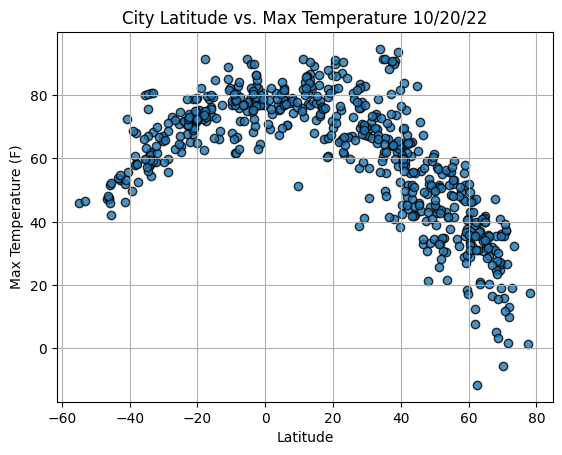

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()